In [40]:
!ls

app.py			 Inferencing.ipynb    test.jpg
captions_train2014.json  model.py	      Training.ipynb
coco			 prebuilt_vocab.pkl   train-model-1-9900.pkl
coco_dataloader.py	 predict.py	      train.py
Dataset_Intro.ipynb	 Preprocessing.ipynb  Untitled.ipynb
Encoder_Decoder.ipynb	 __pycache__	      utils.py
flickr2coco.py		 pycocotools	      vocabulary.py


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from flickr2coco import JsonCreate

In [3]:
img_dir = '../Flickr8k/Flicker8k_Dataset'
file_path = '../Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'
captions_path = '../Flickr8k/Flickr8k_text/Flickr8k.token.txt'

In [4]:
json_create = JsonCreate(img_dir,captions_path,file_path,mode='test')

In [21]:
# json_create.load_captions(captions_path)

In [5]:
cap_dict = json_create.captions_dict
len(cap_dict)

8092

In [88]:
# json_create.load_image_names(file_path)

In [7]:
img_cap_dict = json_create.image_cap_dict
len(img_cap_dict)

1000

In [8]:
# json_create.create_img_dict()

In [9]:
img_dict = json_create.img_dict
len(img_dict['images'])

1000

In [10]:
img_dict

{'images': [{'id': '3385593926_d3e9c21170',
   'file_name': '3385593926_d3e9c21170.jpg',
   'height': 335,
   'width': 500},
  {'id': '2677656448_6b7e7702af',
   'file_name': '2677656448_6b7e7702af.jpg',
   'height': 375,
   'width': 500},
  {'id': '311146855_0b65fdb169',
   'file_name': '311146855_0b65fdb169.jpg',
   'height': 500,
   'width': 393},
  {'id': '1258913059_07c613f7ff',
   'file_name': '1258913059_07c613f7ff.jpg',
   'height': 281,
   'width': 500},
  {'id': '241347760_d44c8d3a01',
   'file_name': '241347760_d44c8d3a01.jpg',
   'height': 500,
   'width': 333},
  {'id': '2654514044_a70a6e2c21',
   'file_name': '2654514044_a70a6e2c21.jpg',
   'height': 333,
   'width': 500},
  {'id': '2339106348_2df90aa6a9',
   'file_name': '2339106348_2df90aa6a9.jpg',
   'height': 334,
   'width': 500},
  {'id': '256085101_2c2617c5d0',
   'file_name': '256085101_2c2617c5d0.jpg',
   'height': 333,
   'width': 500},
  {'id': '280706862_14c30d734a',
   'file_name': '280706862_14c30d734a.jpg',

In [11]:
# json_create.create_annot_dict()

In [12]:
annot_dict = json_create.annot_dict
len(annot_dict['annotations'])

5000

In [13]:
annot_dict

{'annotations': [{'image_id': '3385593926_d3e9c21170',
   'id': '3385593926',
   'caption': 'The dogs are in the snow in front of a fence .'},
  {'image_id': '3385593926_d3e9c21170',
   'id': '3385593926',
   'caption': 'The dogs play on the snow .'},
  {'image_id': '3385593926_d3e9c21170',
   'id': '3385593926',
   'caption': 'Two brown dogs playfully fight in the snow .'},
  {'image_id': '3385593926_d3e9c21170',
   'id': '3385593926',
   'caption': 'Two brown dogs wrestle in the snow .'},
  {'image_id': '3385593926_d3e9c21170',
   'id': '3385593926',
   'caption': 'Two dogs playing in the snow .'},
  {'image_id': '2677656448_6b7e7702af',
   'id': '2677656448',
   'caption': 'a brown and white dog swimming towards some in the pool'},
  {'image_id': '2677656448_6b7e7702af',
   'id': '2677656448',
   'caption': 'A dog in a swimming pool swims toward sombody we cannot see .'},
  {'image_id': '2677656448_6b7e7702af',
   'id': '2677656448',
   'caption': 'A dog swims in a pool near a perso

In [14]:
# json_create.dump_json()

In [15]:
json_create.dump_dict

{'info': {'description': 'FLICKR8K Dataset'},
 'images': [{'id': '3385593926_d3e9c21170',
   'file_name': '3385593926_d3e9c21170.jpg',
   'height': 335,
   'width': 500},
  {'id': '2677656448_6b7e7702af',
   'file_name': '2677656448_6b7e7702af.jpg',
   'height': 375,
   'width': 500},
  {'id': '311146855_0b65fdb169',
   'file_name': '311146855_0b65fdb169.jpg',
   'height': 500,
   'width': 393},
  {'id': '1258913059_07c613f7ff',
   'file_name': '1258913059_07c613f7ff.jpg',
   'height': 281,
   'width': 500},
  {'id': '241347760_d44c8d3a01',
   'file_name': '241347760_d44c8d3a01.jpg',
   'height': 500,
   'width': 333},
  {'id': '2654514044_a70a6e2c21',
   'file_name': '2654514044_a70a6e2c21.jpg',
   'height': 333,
   'width': 500},
  {'id': '2339106348_2df90aa6a9',
   'file_name': '2339106348_2df90aa6a9.jpg',
   'height': 334,
   'width': 500},
  {'id': '256085101_2c2617c5d0',
   'file_name': '256085101_2c2617c5d0.jpg',
   'height': 333,
   'width': 500},
  {'id': '280706862_14c30d734a

In [16]:
from pycocotools.coco import COCO

In [17]:
coco = COCO('Flickr8k_test.json',is_flickr=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [18]:
coco.info()

description: FLICKR8K Dataset


In [19]:
import numpy as np
import nltk
from tqdm import tqdm
ids = list(coco.anns.keys())[:10]
tokens = list()
for idx in tqdm(np.arange(len(ids))):
    caption = str(coco.anns[ids[idx]]['caption']).lower()
    tokens.append(nltk.tokenize.word_tokenize(caption))
            
caption_lengths=[len(token) for token in tokens]

100%|██████████| 10/10 [00:00<00:00, 664.72it/s]


In [20]:
caption_lengths

[7, 11, 15, 17, 11, 12, 16, 11, 14, 8]

In [21]:
key = list(coco.imgs.keys())
id_key = [i.split('_')[0] for i in key]
len(set(id_key)),len(set(key))

(1000, 1000)

The American footballer is wearing a red and white strip .


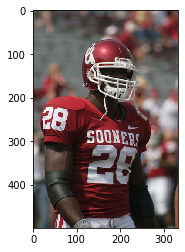

In [23]:
import os
from PIL import Image
import matplotlib.pyplot as plt
ann_id = ids[4]
# print(ann_id)
caption = coco.anns[ann_id]['caption']
print(caption)
img_id =coco.anns[ann_id]['image_id']
# print(img_id)


img_path = coco.loadImgs(img_id)['file_name']
# print(img_path)

# #Transform the image to load into PyTorch
image =Image.open(os.path.join(img_dir,img_path)).convert("RGB")
# image = self.transform(image)
plt.imshow(image)    

In [28]:
from vocabulary import Vocabulary
import torch

In [29]:
tokens = nltk.tokenize.word_tokenize(str(caption).lower())
caption = []

vocab = Vocabulary(5,anns_file='Flickr8k_test.json',load_vocab=True)

caption.append(vocab(vocab.start_seq))
caption.extend([vocab(token) for token in tokens])
caption.append(vocab(vocab.end_seq))
caption = torch.Tensor(caption).long()

Loaded pre-built vocab file


In [30]:
caption

tensor([   0, 6533,    2,   86,    2,   86,  949,   86, 4004,    2,    1])